# 0. Geothermal Data Exploration

Short notebook to grab a geothermal dataset, and export for further use. 

Grabbing the data from SMU Repository loacted here: http://geothermal.smu.edu/static/DownloadFilesButtonPage.htm

In [1]:
!wget http://geothermal.smu.edu/static/DatasetsZipped/core.surface_site_county_state_materialized_view.zip

--2023-03-28 16:29:27--  http://geothermal.smu.edu/static/DatasetsZipped/core.surface_site_county_state_materialized_view.zip
Resolving geothermal.smu.edu (geothermal.smu.edu)... 129.119.65.73
Connecting to geothermal.smu.edu (geothermal.smu.edu)|129.119.65.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77644711 (74M) [application/zip]
Saving to: ‘core.surface_site_county_state_materialized_view.zip’

core.surface_site_c 100%[===================>]  74.05M  22.5MB/s    in 3.3s    

2023-03-28 16:29:30 (22.5 MB/s) - ‘core.surface_site_county_state_materialized_view.zip’ saved [77644711/77644711]



In [2]:
!unzip core.surface_site_county_state_materialized_view.zip

Archive:  core.surface_site_county_state_materialized_view.zip
  inflating: core.surface_site_county_state_materialized_view.csv  


Information about the dataset can be found here: http://geothermal.smu.edu/static/DescribeColumns/AggregatedWellData.pdf

### Python starts here

If you want to re-run this from the beginning, start here!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [4]:
filename = 'core.surface_site_county_state_materialized_view.csv'

df = pd.read_csv(filename)
df.head(6)

,id,uuid,name,site_name,other_location_name,api,latitude,longitude,state_id,state,...,county,county_id,bht,max_temperature,depth,shape,datasource,thermal_conductivity,heat_flow,precision_log_source_id
0,525c74fd-a649-3f22-b8c8-8b6aeacb7b93,525c74fd-a649-3f22-b8c8-8b6aeacb7b93,42067802240000,NaN,NaN,42067802240000,32.939179,-94.148047,15.0,Texas,...,Cass County,4696.0,NaN,NaN,NaN,0101000020E610000021318B9A798957C0F04BA2033778...,MLKay,NaN,NaN,NaN
1,525c868b-820a-378a-8202-0bab8ee18479,525c868b-820a-378a-8202-0bab8ee18479,42135301260000,NaN,NaN,42135301260000,31.904262,-102.618668,15.0,Texas,...,Ector County,4897.0,NaN,NaN,1793.7480,0101000020E61000000525164298A759C0D28437B57DE7...,MLKay,NaN,NaN,NaN
2,525c9719-b3b8-3a60-9128-55e1fca5092b,525c9719-b3b8-3a60-9128-55e1fca5092b,42227341000000,NaN,NaN,42227341000000,32.115021,-101.260268,15.0,Texas,...,Howard County,4829.0,NaN,NaN,762.0000,0101000020E6100000578D6F39A85059C0F5EB9804B90E...,MLKay,NaN,NaN,NaN
3,525c9f62-8700-37a7-bdff-65c314d97bf2,525c9f62-8700-37a7-bdff-65c314d97bf2,42199322760000,NaN,NaN,42199322760000,30.141824,-94.431920,15.0,Texas,...,Hardin County,5123.0,NaN,NaN,1232.3064,0101000020E61000006A1E7695A49B57C08445459C4E24...,MLKay,NaN,NaN,NaN
4,525cae4a-52ed-370d-854c-c2bbfef4057b,525cae4a-52ed-370d-854c-c2bbfef4057b,42047000500000,NaN,NaN,42047000500000,27.252928,-98.165750,15.0,Texas,...,Brooks County,5762.0,NaN,NaN,2926.0800,0101000020E61000000475CAA39B8A58C09EBBB8E8BF40...,MLKay,NaN,NaN,NaN
5,525d4333-a815-3c8e-999b-89502fdf054f,525d4333-a815-3c8e-999b-89502fdf054f,42417337370000,NaN,NaN,42417337370000,32.799227,-99.154217,15.0,Texas,...,Shackelford County,4767.0,NaN,NaN,220.6752,0101000020E61000009A1F24B0DEC958C002C985144D66...,MLKay,NaN,NaN,NaN


Need to fix API numbers

Dropping some columns due to duplicate or unessary info. 

In [5]:
df.drop('id', inplace=True, axis=1)

## Some quick dataframe exploration

In [6]:
original_row_count = df.shape[0]
df.shape

(973462, 20)

In [7]:
df.describe()

,latitude,longitude,state_id,county_id,bht,max_temperature,depth,thermal_conductivity,heat_flow
count,973431.000000,973431.000000,929227.000000,929229.00000,1.420690e+05,10410.000000,652206.000000,77140.000000,76305.000000
mean,31.713129,-97.884886,15.771716,4820.77445,1.546958e+02,37.626682,1955.982767,2.112322,88.666699
std,4.434414,10.836636,4.631544,651.25847,2.772849e+04,44.003884,1211.760385,0.464913,257.250528
min,0.000000,-180.927301,1.000000,1.00000,-3.333333e+00,-0.220000,0.700000,0.260000,-0.600000
25%,30.042894,-101.250728,15.000000,4675.00000,4.720000e+01,15.280000,1019.860800,1.900000,49.920000
50%,32.073083,-98.877778,15.000000,4851.00000,7.890000e+01,22.200000,1798.320000,2.070000,59.000000
75%,33.159859,-96.991659,15.000000,5096.00000,1.078000e+02,42.790000,2737.104000,2.320000,75.000000
max,71.199684,0.000000,51.000000,6019.00000,1.045146e+07,355.000000,78373.224000,7.235000,23012.000000


Looks like there are some rows without lat and long. We will also drop state_id and depths, this will limit the area to onshore US.

In [8]:
df = df.dropna(subset=['latitude', 'longitude', 'depth', 'state_id'])

Doing a quick plot of depth, to see what we have:

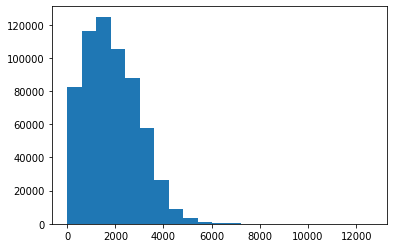

In [9]:
plt.hist(df.depth, bins = 21); #play with the bins!

Depth is in meters! Looks like we only have a few above 6000m, but lets remove those as well.

In [10]:
df = df[df['depth'] <= 6000]

Will also round the depths, lat, and long. 

In [11]:
df.depth = np.round(df.depth.values, 2)
df.longitude = np.round(df.longitude.values, 3)
df.latitude = np.round(df.latitude.values, 3)

quick re-plot

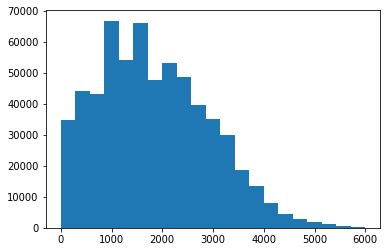

In [12]:
plt.hist(df.depth, bins = 21); #play with the bins!

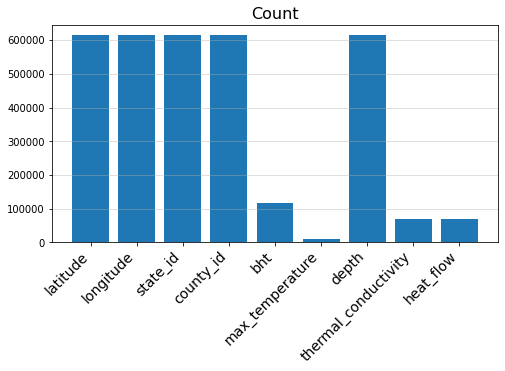

In [13]:
plt.figure(figsize=(8,4))

plt.bar(df.describe().columns,
        df.describe().T['count'].values);

plt.grid(axis='y',
        alpha=0.5)

plt.title('Count', size=16)

plt.xticks(rotation=45, ha='right', size=14);

In [14]:
df = df.dropna(axis=0, #drop rows
                thresh=6) # requires 6 non-NA values

In [15]:
new_row_count = df.shape[0]
print('Number of rows removed:', original_row_count - new_row_count)

print('dataframe shape (rows, columns)', df.shape)

Number of rows removed: 358919
dataframe shape (rows, columns) (614543, 20)


### Adding in Gravity Geophysical Data:

information about the dataset is here: https://mrdata.usgs.gov/gravity/

In [16]:
filename_iso = 'isograv.xyz'
colnames_iso =['longitude', 'latitude', 'iso_grav'] 

df_iso = pd.read_csv(filename_iso, delim_whitespace=True, lineterminator='\n', names=colnames_iso)

df_iso.longitude = np.round(df_iso.longitude.values, 3)
df_iso.latitude = np.round(df_iso.latitude.values, 3)

df_iso.head(5)

,longitude,latitude,iso_grav
0,-97.657,24.638,21.3
1,-97.618,24.639,21.6
2,-97.579,24.640,21.8
3,-97.540,24.640,22.3
4,-97.501,24.641,22.4


In [17]:
filename_bou = 'bouguer.xyz'
colnames_bou =['longitude', 'latitude', 'bou_grav'] 

df_bou = pd.read_csv(filename_bou, delim_whitespace=True, lineterminator='\n', names=colnames_bou)

df_bou.longitude = np.round(df_bou.longitude.values, 3)
df_bou.latitude = np.round(df_bou.latitude.values, 3)

df_bou.head(5)

,longitude,latitude,bou_grav
0,-97.657,24.638,23.0
1,-97.618,24.639,25.0
2,-97.579,24.640,26.0
3,-97.540,24.640,26.0
4,-97.501,24.641,27.0


In [18]:
df_grav = df_iso.merge(df_bou, on=['longitude', 'latitude'], how='inner')
df_grav

,longitude,latitude,iso_grav,bou_grav
0,-97.657,24.638,21.3,23.0
1,-97.618,24.639,21.6,25.0
2,-97.579,24.640,21.8,26.0
3,-97.540,24.640,22.3,26.0
4,-97.501,24.641,22.4,27.0
...,...,...,...,...
728652,-126.718,48.955,-42.5,-30.0
728653,-126.666,48.966,-42.3,-29.0
728654,-126.615,48.978,-41.5,-29.0
728655,-126.564,48.989,-44.9,-29.0


Let's combine these dataframes:

In [19]:
frames = [df, df_grav]
combo_df = pd.concat(frames)

In [20]:
combo_df.describe()

,latitude,longitude,state_id,county_id,bht,max_temperature,depth,thermal_conductivity,heat_flow,iso_grav,bou_grav
count,1.343200e+06,1.343200e+06,614543.000000,614543.000000,115689.000000,9813.000000,614543.000000,70445.000000,69407.000000,728657.000000,728657.000000
mean,3.499662e+01,-9.694343e+01,16.039524,4797.500522,76.986959,38.029403,1843.006276,2.126775,84.895872,-8.935975,-63.696720
std,5.913487e+00,1.265698e+01,5.368075,724.290776,41.370140,44.824003,1084.530553,0.436863,254.061368,19.801887,68.972251
min,1.939500e+01,-1.652700e+02,1.000000,1.000000,-0.410000,-0.220000,0.910000,0.260000,-0.600000,-224.300000,-339.000000
25%,3.105000e+01,-1.025000e+02,15.000000,4678.000000,43.000000,15.080000,998.220000,1.920000,50.000000,-21.600000,-96.000000
50%,3.317500e+01,-9.852200e+01,15.000000,4856.000000,72.000000,22.290000,1706.580000,2.086000,58.000000,-9.200000,-42.000000
75%,3.921400e+01,-9.091400e+01,15.000000,5098.000000,105.600000,43.000000,2588.000000,2.330000,73.660000,3.700000,-16.000000
max,7.110000e+01,-6.434700e+01,51.000000,6019.000000,360.000000,355.000000,5997.550000,7.235000,23012.000000,104.800000,95.000000


Lets compare that to a merge:

In [21]:
merge_df = df.merge(df_grav, on=['longitude', 'latitude'], how='outer')

In [22]:
merge_df.describe()

,latitude,longitude,state_id,county_id,bht,max_temperature,depth,thermal_conductivity,heat_flow,iso_grav,bou_grav
count,1.342867e+06,1.342867e+06,614543.000000,614543.000000,115689.000000,9813.000000,614543.000000,70445.000000,69407.000000,728709.000000,728709.000000
mean,3.499739e+01,-9.694283e+01,16.039524,4797.500522,76.986959,38.029403,1843.006276,2.126775,84.895872,-8.936451,-63.697263
std,5.913816e+00,1.265835e+01,5.368075,724.290776,41.370140,44.824003,1084.530553,0.436863,254.061368,19.801785,68.973315
min,1.939500e+01,-1.652700e+02,1.000000,1.000000,-0.410000,-0.220000,0.910000,0.260000,-0.600000,-224.300000,-339.000000
25%,3.105000e+01,-1.025010e+02,15.000000,4678.000000,43.000000,15.080000,998.220000,1.920000,50.000000,-21.600000,-96.000000
50%,3.317600e+01,-9.852100e+01,15.000000,4856.000000,72.000000,22.290000,1706.580000,2.086000,58.000000,-9.200000,-42.000000
75%,3.921600e+01,-9.091000e+01,15.000000,5098.000000,105.600000,43.000000,2588.000000,2.330000,73.660000,3.700000,-16.000000
max,7.110000e+01,-6.434700e+01,51.000000,6019.000000,360.000000,355.000000,5997.550000,7.235000,23012.000000,104.800000,95.000000


#### Export

Let's export this as a parquet file: https://en.wikipedia.org/wiki/Apache_Parquet

In [23]:
merge_df.to_parquet('cleaned_geothermal_data.parquet')

We will continue the analysis in a new notebook! :)